<a href="https://colab.research.google.com/github/JGH-99/AI/blob/main/Lab7_Part2_Chapter5_VanishingGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Two hidden layers:
Average gradient for the hidden layers: [0.06489669468427525, 0.33130108772000694]
Saving the averaged gradient for the top six neurons in each layer.
relevant material (early chapter 5).
Epoch: 0
Epoch 0 training complete in 0.64
Total training time: 0.64
Epoch: 1
Epoch 0 training complete in 0.63
Total training time: 0.63
Epoch: 2
Epoch 0 training complete in 0.89
Total training time: 0.89
Epoch: 3
Epoch 0 training complete in 0.23
Total training time: 0.23
Epoch: 4
Epoch 0 training complete in 0.20
Total training time: 0.20
Epoch: 5
Epoch 0 training complete in 0.20
Total training time: 0.20
Epoch: 6
Epoch 0 training complete in 0.23
Total training time: 0.23
Epoch: 7
Epoch 0 training complete in 0.22
Total training time: 0.22
Epoch: 8
Epoch 0 training complete in 0.20
Total training time: 0.20
Epoch: 9
Epoch 0 training complete in 0.23
Total training time: 0.23
Epoch: 10
Epoch 0 training complete in 0.21
Total training time: 0.21
Epoch: 11
Epoch 0 training compl

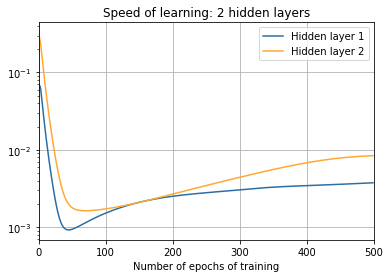


Three hidden layers:
Average gradient for the hidden layers: [0.015902137626342384, 0.07503729981748693, 0.37737333335014733]
Epoch: 0
Epoch 0 training complete in 0.27
Total training time: 0.27
Epoch: 1
Epoch 0 training complete in 0.26
Total training time: 0.26
Epoch: 2
Epoch 0 training complete in 0.26
Total training time: 0.26
Epoch: 3
Epoch 0 training complete in 0.26
Total training time: 0.26
Epoch: 4
Epoch 0 training complete in 0.25
Total training time: 0.25
Epoch: 5
Epoch 0 training complete in 0.26
Total training time: 0.26
Epoch: 6
Epoch 0 training complete in 0.25
Total training time: 0.25
Epoch: 7
Epoch 0 training complete in 0.28
Total training time: 0.28
Epoch: 8
Epoch 0 training complete in 0.26
Total training time: 0.26
Epoch: 9
Epoch 0 training complete in 0.25
Total training time: 0.25
Epoch: 10
Epoch 0 training complete in 0.25
Total training time: 0.25
Epoch: 11
Epoch 0 training complete in 0.27
Total training time: 0.27
Epoch: 12
Epoch 0 training complete in 0.27

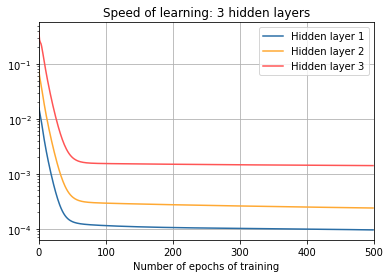


Four hidden layers:
Average gradient for the hidden layers: [0.0030776079015145245, 0.015021948145953217, 0.06308880457479753, 0.2714033351725411]
Epoch: 0
Epoch 0 training complete in 0.30
Total training time: 0.30
Epoch: 1
Epoch 0 training complete in 0.32
Total training time: 0.32
Epoch: 2
Epoch 0 training complete in 0.30
Total training time: 0.30
Epoch: 3
Epoch 0 training complete in 0.34
Total training time: 0.34
Epoch: 4
Epoch 0 training complete in 0.31
Total training time: 0.31
Epoch: 5
Epoch 0 training complete in 0.31
Total training time: 0.31
Epoch: 6
Epoch 0 training complete in 0.31
Total training time: 0.31
Epoch: 7
Epoch 0 training complete in 0.30
Total training time: 0.30
Epoch: 8
Epoch 0 training complete in 0.33
Total training time: 0.33
Epoch: 9
Epoch 0 training complete in 0.30
Total training time: 0.30
Epoch: 10
Epoch 0 training complete in 0.32
Total training time: 0.32
Epoch: 11
Epoch 0 training complete in 0.30
Total training time: 0.30
Epoch: 12
Epoch 0 trai

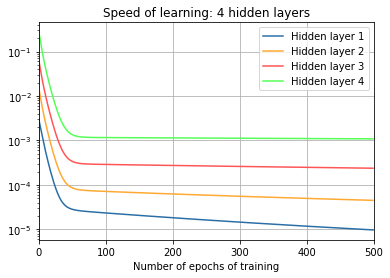

In [ ]:
"""generate_gradient.py
~~~~~~~~~~~~~~~~~~~~~~~

Use network2 to figure out the average starting values of the gradient
error terms \delta^l_j = \partial C / \partial z^l_j = \partial C /
\partial b^l_j.

"""

#### Libraries
# Standard library
import json
import math
import random
import shutil
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/nn/book")

# My library
import mnist_loader
import network2

# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np

# Python3 port
from functools import reduce

def main():
    # Load the data
    full_td, _, _ = mnist_loader.load_data_wrapper()
    td = list(full_td)[:1000] # Just use the first 1000 items of training data
    epochs = 500 # Number of epochs to train for

    print("\nTwo hidden layers:")
    net = network2.Network([784, 30, 30, 10])
    initial_norms(td, net)
    abbreviated_gradient = [
        ag[:6] for ag in get_average_gradient(net, td)[:-1]] 
    print("Saving the averaged gradient for the top six neurons in each "+\
        "layer.\nWARNING: This will affect the look of the book, so be "+\
        "sure to check the\nrelevant material (early chapter 5).")
    f = open("initial_gradient.json", "w")
    json.dump(abbreviated_gradient, f)
    f.close()
#    shutil.copy("initial_gradient.json", "../../js/initial_gradient.json")
    training(td, net, epochs, "norms_during_training_2_layers.json")
    plot_training(
        epochs, "norms_during_training_2_layers.json", 2)

    print("\nThree hidden layers:")
    net = network2.Network([784, 30, 30, 30, 10])
    initial_norms(td, net)
    training(td, net, epochs, "norms_during_training_3_layers.json")
    plot_training(
        epochs, "norms_during_training_3_layers.json", 3)

    print("\nFour hidden layers:")
    net = network2.Network([784, 30, 30, 30, 30, 10])
    initial_norms(td, net)
    training(td, net, epochs, 
             "norms_during_training_4_layers.json")
    plot_training(
        epochs, "norms_during_training_4_layers.json", 4)

def initial_norms(training_data, net):
    average_gradient = get_average_gradient(net, training_data)
    norms = [list_norm(avg) for avg in average_gradient[:-1]]
    print("Average gradient for the hidden layers: "+str(norms))
    
def training(training_data, net, epochs, filename):
    norms = []
    for j in range(epochs):
        average_gradient = get_average_gradient(net, training_data)
        norms.append([list_norm(avg) for avg in average_gradient[:-1]])
        print(f"Epoch: {j}")
        net.SGD(training_data, 1, 1000, 0.1, lmbda=5.0)
    f = open(filename, "w")
    json.dump(norms, f)
    f.close()

def plot_training(epochs, filename, num_layers):
    f = open(filename, "r")
    norms = json.load(f)
    f.close()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ["#2A6EA6", "#FFA933", "#FF5555", "#55FF55", "#5555FF"]
    for j in range(num_layers):
        ax.plot(np.arange(epochs), 
                [n[j] for n in norms], 
                color=colors[j],
                label="Hidden layer %s" % (j+1,))
    ax.set_xlim([0, epochs])
    ax.grid(True)
    ax.set_xlabel('Number of epochs of training')
    ax.set_title('Speed of learning: %s hidden layers' % num_layers)
    ax.set_yscale('log')
    plt.legend(loc="upper right")
    plt.show()

def get_average_gradient(net, training_data):
    nabla_b_results = [net.backprop(x, y)[0] for x, y in training_data]
    gradient = list_sum(nabla_b_results)
    return [(np.reshape(g, len(g))/len(training_data)).tolist() 
            for g in gradient]

def zip_sum(a, b): 
    return [x+y for (x, y) in zip(a, b)]

def list_sum(l):
    return reduce(zip_sum, l)

def list_norm(l):
    return math.sqrt(sum([x*x for x in l]))

main()

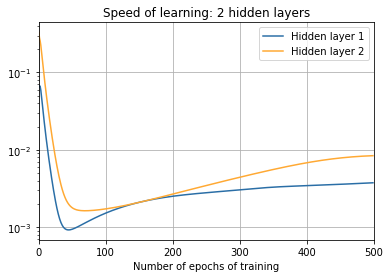

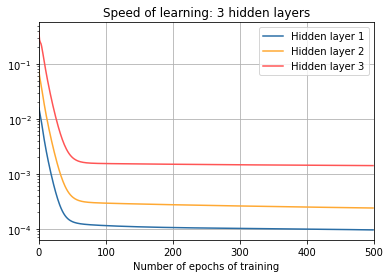

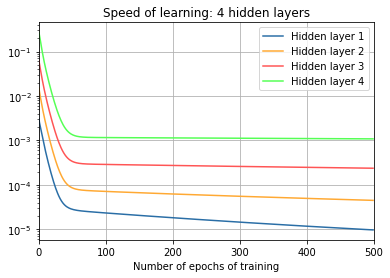